<a href="https://colab.research.google.com/github/ajmoore12/WPA_Competition/blob/main/wpac_merging_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade google-cloud-bigquery-storage pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [16]:
# import torch
# print("GPU Available:", torch.cuda.is_available())

# if torch.cuda.is_available():
#     print("GPU Name:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [2]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery
import pandas as pd

project_id = 'wpac-449904'
dataset_id = 'wpac_data'
# Create a storage client
client = bigquery.Client(project=project_id)

In [3]:
pd.set_option('display.max_columns', None)

careers = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_careers`").to_dataframe()
jobs = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_jobs`").to_dataframe()
all_time_connect = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_all_time_connect`").to_dataframe()
individual = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_individual`").to_dataframe()
other_events = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_other_events`").to_dataframe()
programs = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_programs`").to_dataframe()
resources = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_resources`").to_dataframe()
survey = client.query(f"SELECT * FROM `{project_id}.{dataset_id}.cleaned_survey`").to_dataframe()



In [4]:
all_time_connect.head()

,_id,collectionType,eventName,createdAt,partnerRegion,sessionId,data_careerId,data_jobId,data_programId,data_resourceId,WPA_id
0,6663e9a6daf5f872d641dce5,NA,edited status,2024-06-08 09:18:30+00:00,Atlanta,e059e07d-48c1-49e4-af6e-162add85fc9b,NA,NA,630c6a622c7386c831f3d16c,NA,WPA_105333
1,6648b3e7bbe71cd48bb64f6c,NA,edited status,2024-05-18 17:57:59+00:00,Atlanta,fce6d678-5e24-4357-aa02-15a87f4e2f97,NA,NA,64c976148776a05127ca769e,NA,WPA_106152
2,6648dec733dcbb5ec5de8904,NA,edited status,2024-05-18 21:00:58+00:00,Atlanta,3ba85c3e-d4b1-4483-8412-2879a85a3fa6,NA,NA,64c9772a8776a05127ca867d,NA,WPA_106199
3,6648dec9bbe71cd48bb6cc74,NA,edited status,2024-05-18 21:01:00+00:00,Atlanta,3ba85c3e-d4b1-4483-8412-2879a85a3fa6,NA,NA,64c9772a8776a05127ca867d,NA,WPA_106199
4,6678b884c8205e4485c657b3,NA,edited status,2024-06-24 04:06:27+00:00,Atlanta,fd45e415-3a71-4034-9856-a77045e05329,NA,NA,628aed8312545d84f96e82c7,NA,WPA_106392


In [7]:
resources.head()

,data_careerId,resource_tag
0,63e53d1f3f747a7a197b9830,2nd chance
1,63e53d283f747a7a197b984a,2nd chance
2,63e53d433f747a7a197b9886,2nd chance
3,64235c7c7c3291cfa0c7ade2,2nd chance
4,66fecf61316f27e20fa7ffd1,2nd chance


In [19]:
print(survey.shape)

(19307, 106)


In [14]:
merge1 = all_time_connect.merge(resources, on='data_careerId', how='left')
merge2 = merge1.merge(individual, on='WPA_id', how='left')
merge3 = merge2.merge(other_events, on='WPA_id', how='left')
merge4 = merge3.merge(jobs, on='data_jobId', how='left')
merge5 = merge4.merge(careers, on='data_careerId', how='left')
merge6 = merge5.merge(programs, on='data_careerId', how='left')

In [24]:
duplicates = merge6[merge6.duplicated(subset=['WPA_id'], keep=False)]
print(len(duplicates))
merge6 = merge6.drop_duplicates(subset=['WPA_id'])
final_merge = survey.merge(merge6, on='WPA_id', how='left')


11131731


In [25]:
df = final_merge.copy()
df.shape

(19307, 178)

In [21]:
print(df.head())

  version year_quarter  children  concern_finances  concern_health  \
0    C1Q2       2023Q1         0                 0               0   
1    C1Q2       2023Q1         0                 0               0   
2    C1Q2       2023Q1         0                 0               0   
3    C1Q2       2023Q1         0                 0               0   
4    C1Q2       2023Q1         0                 0               0   

   concern_job  concern_job_search  concern_social  contract_work  \
0            0                   0               0              1   
1            0                   0               0              1   
2            0                   0               0              1   
3            0                   0               0              1   
4            0                   0               0              1   

   current_job_benefits_childcare  current_job_benefits_education  \
0                               0                               0   
1                         

In [32]:
# Filter for only those who got a new job and deduplicate by WPA_id
filtered_matching_df = df[df['new_job'] == 1].drop_duplicates(subset=['WPA_id'])

# Define the reason and new job columns to compare
reason_cols = ['main_reason_advancement', 'main_reason_benefits', 'main_reason_better_hours',
               'main_reason_commute', 'main_reason_environment', 'main_reason_higher_pay']

new_job_cols = ['new_job_better_advancement', 'new_job_better_benefits', 'new_job_better_hours',
                'new_job_better_commute', 'new_job_better_environment', 'new_job_better_pay']

# Create a new DataFrame to track matches
filtered_matching_df['match_count'] = sum(
    filtered_matching_df[reason] == filtered_matching_df[new_job] for reason, new_job in zip(reason_cols, new_job_cols)
)

# Create a dictionary to track matches for each reason category
match_counts_by_reason = {}

# Compute matches for each reason and store them separately
for reason, new_job in zip(reason_cols, new_job_cols):
    filtered_matching_df[f'match_{reason}'] = filtered_matching_df[reason] == filtered_matching_df[new_job]

# Pivot table based on skillup_find_new_job and breaking out by reason
pivot_table_matching_breakout = filtered_matching_df.pivot_table(
    index='skillup_find_new_job',
    values=[f'match_{reason}' for reason in reason_cols],
    aggfunc='sum'  # Sum the matches for each reason category
)

pivot_table_matching_breakout


,match_main_reason_advancement,match_main_reason_benefits,match_main_reason_better_hours,match_main_reason_commute,match_main_reason_environment,match_main_reason_higher_pay
skillup_find_new_job,,,,,,
0,1686,1708,1411,1740,1491,1214
1,257,242,223,275,255,189


In [35]:
filtered_matching_df.head()

,version,year_quarter,children,concern_finances,concern_health,concern_job,concern_job_search,concern_social,contract_work,current_job_benefits_childcare,current_job_benefits_education,current_job_benefits_health,current_job_benefits_none,current_job_benefits_pto,current_job_benefits_schedule,current_job_benefits_training,current_job_benefits_transportation,desired_industry_other,education_x,gender,household_adult_children,household_decline,household_none,household_other,household_other_relatives,household_parents,household_siblings,household_spouse,household_young_children,income,income_covered_expenses,job_confidence,job_search_challenge,new_job,new_job_better_advancement,new_job_better_benefits,new_job_better_commute,new_job_better_environment,new_job_better_hours,new_job_better_pay,new_job_better_title,new_job_field,new_job_income,new_job_looking,previous_job_income,public_benefits_childcare,public_benefits_decline,public_benefits_disability,public_benefits_eitc,public_benefits_medicare,public_benefits_none,public_benefits_pell,public_benefits_snap,public_benefits_tanf,public_benefits_ui,public_benefits_wioa,race_x,skillup_entry_reason_better_job,skillup_entry_reason_current_industry_skills,skillup_entry_reason_lost_job,skillup_entry_reason_new_industry_skills,skillup_find_new_job,skillup_helpful_awareness_career,skillup_helpful_awareness_training,skillup_helpful_confidence_job,skillup_helpful_new_job,skillup_recommend,skillup_training,training_enrolled,training_field,training_plan_to_enroll,training_support_services,worked_past_six_months,years_experience,WPA_id,new_industry_Business,new_industry_Healthcare,new_industry_Missing,new_industry_Skilled Trades,new_industry_Technology,new_industry_Transportation & Logistics,main_reason_None,main_reason_advancement,main_reason_benefits,main_reason_better_hours,main_reason_commute,main_reason_environment,main_reason_higher_pay,payment_Contractor,payment_Hourly,payment_Missing,payment_Salary,expenses_Decreased,expenses_Increased,expenses_Stayed the same,employ_Other,employ_Full-Time,employ_Part-Time,employ_Unemployed,industry_Business,industry_Healthcare,industry_None,industry_Skilled Trades,industry_Supply Chain & Logistics,industry_Technology,industry_Transportation & Logistics,_id,collectionType_x,eventName_x,createdAt_x,partnerRegion_x,sessionId,data_careerId,data_jobId,data_programId,data_resourceId,resource_tag,rural_type,lastLoggedInAt,myPathCompleted,preferredRegion,preferredRegionGroup,createdAt_y,updatedAt_x,educationAndWorkExperience,workExperienceGroup,race_y,highestEducationLevel,latestSalaryType,activeMilestone,completed_work_styles,retention,completed_career_milestone,completed_jobs_milestone,completed_training_milestone,gender_3,birth_year,ed_work_exp_missing,age,educ_level,collectionType_y,eventName_y,eventType,partnerRegion_y,career_area_name,company_name,createdAt,isPartTime,expiredAt,industry_clean,isPartner,is_earn_and_learn,is_estimated_salary,is_gateway_job,max_salary,min_salary,min_years_experience,min_edulevel_name,remote_type_name,onet,onet_name,salary,title_name,updatedAt_y,education_y,jobZone,onetTitle,name,institution,hours,costZone,institutionType,careerName,programType,careerFields,industries,catalog,format,match_count,match_main_reason_advancement,match_main_reason_benefits,match_main_reason_better_hours,match_main_reason_commute,match_main_reason_environment,match_main_reason_higher_pay
1,C1Q3,2023Q2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,0,2,1,1,0,0,0,1,0,1,0,2,35000,1,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,5,0,0,0,0,0,0,4,WPA_343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,65fee861035723383f3bbcd9,careers,viewed a catalog item,2024-03-23 18:34:09+00:00,Denver,1715f0fc-d120-4d1f-b289-44594358d153,63e543593f747a7a197b9c4f,NA,NA,NA,NaN,1,2024-06-10 04:16:26+00:00,0,Denver,0,2022-06-06 16:02:19+00:00,2024-05-14 01:34:58+00:00,15+ years,1,0,1,0,training,False,True,0,0,0,2,1988,0,37,0,jobs,selected filters

In [36]:
# Create a binary target column
filtered_matching_df['target'] = (
    (filtered_matching_df['skillup_find_new_job'] == 1) &  # Skillup helped find a new job
    (filtered_matching_df['new_job'] == 1) &  # They got a new job
    (filtered_matching_df['match_count'] > 0)  # At least one match between main_reason and new_job_better_
).astype(int)


,version,year_quarter,children,concern_finances,concern_health,concern_job,concern_job_search,concern_social,contract_work,current_job_benefits_childcare,current_job_benefits_education,current_job_benefits_health,current_job_benefits_none,current_job_benefits_pto,current_job_benefits_schedule,current_job_benefits_training,current_job_benefits_transportation,desired_industry_other,education_x,gender,household_adult_children,household_decline,household_none,household_other,household_other_relatives,household_parents,household_siblings,household_spouse,household_young_children,income,income_covered_expenses,job_confidence,job_search_challenge,new_job,new_job_better_advancement,new_job_better_benefits,new_job_better_commute,new_job_better_environment,new_job_better_hours,new_job_better_pay,new_job_better_title,new_job_field,new_job_income,new_job_looking,previous_job_income,public_benefits_childcare,public_benefits_decline,public_benefits_disability,public_benefits_eitc,public_benefits_medicare,public_benefits_none,public_benefits_pell,public_benefits_snap,public_benefits_tanf,public_benefits_ui,public_benefits_wioa,race_x,skillup_entry_reason_better_job,skillup_entry_reason_current_industry_skills,skillup_entry_reason_lost_job,skillup_entry_reason_new_industry_skills,skillup_find_new_job,skillup_helpful_awareness_career,skillup_helpful_awareness_training,skillup_helpful_confidence_job,skillup_helpful_new_job,skillup_recommend,skillup_training,training_enrolled,training_field,training_plan_to_enroll,training_support_services,worked_past_six_months,years_experience,WPA_id,new_industry_Business,new_industry_Healthcare,new_industry_Missing,new_industry_Skilled Trades,new_industry_Technology,new_industry_Transportation & Logistics,main_reason_None,main_reason_advancement,main_reason_benefits,main_reason_better_hours,main_reason_commute,main_reason_environment,main_reason_higher_pay,payment_Contractor,payment_Hourly,payment_Missing,payment_Salary,expenses_Decreased,expenses_Increased,expenses_Stayed the same,employ_Other,employ_Full-Time,employ_Part-Time,employ_Unemployed,industry_Business,industry_Healthcare,industry_None,industry_Skilled Trades,industry_Supply Chain & Logistics,industry_Technology,industry_Transportation & Logistics,_id,collectionType_x,eventName_x,createdAt_x,partnerRegion_x,sessionId,data_careerId,data_jobId,data_programId,data_resourceId,resource_tag,rural_type,lastLoggedInAt,myPathCompleted,preferredRegion,preferredRegionGroup,createdAt_y,updatedAt_x,educationAndWorkExperience,workExperienceGroup,race_y,highestEducationLevel,latestSalaryType,activeMilestone,completed_work_styles,retention,completed_career_milestone,completed_jobs_milestone,completed_training_milestone,gender_3,birth_year,ed_work_exp_missing,age,educ_level,collectionType_y,eventName_y,eventType,partnerRegion_y,career_area_name,company_name,createdAt,isPartTime,expiredAt,industry_clean,isPartner,is_earn_and_learn,is_estimated_salary,is_gateway_job,max_salary,min_salary,min_years_experience,min_edulevel_name,remote_type_name,onet,onet_name,salary,title_name,updatedAt_y,education_y,jobZone,onetTitle,name,institution,hours,costZone,institutionType,careerName,programType,careerFields,industries,catalog,format,match_count,match_main_reason_advancement,match_main_reason_benefits,match_main_reason_better_hours,match_main_reason_commute,match_main_reason_environment,match_main_reason_higher_pay,target
1,C1Q3,2023Q2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,0,2,1,1,0,0,0,1,0,1,0,2,35000,1,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,5,0,0,0,0,0,0,4,WPA_343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,65fee861035723383f3bbcd9,careers,viewed a catalog item,2024-03-23 18:34:09+00:00,Denver,1715f0fc-d120-4d1f-b289-44594358d153,63e543593f747a7a197b9c4f,NA,NA,NA,NaN,1,2024-06-10 04:16:26+00:00,0,Denver,0,2022-06-06 16:02:19+00:00,2024-05-14 01:34:58+00:00,15+ years,1,0,1,0,training,False,True,0,0,0,2,1988,0,37,0,jobs,selected 

In [40]:
sample_df = filtered_matching_df[['WPA_id', 'new_job', 'skillup_find_new_job', 'match_count', 'target']].sort_values(by='target', ascending=False).head(2000)

In [41]:
from google.colab import files

# Save DataFrame to CSV
sample_df.to_csv('sample_df_target.csv', index=False)

# Download the file
files.download('sample_df_target.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

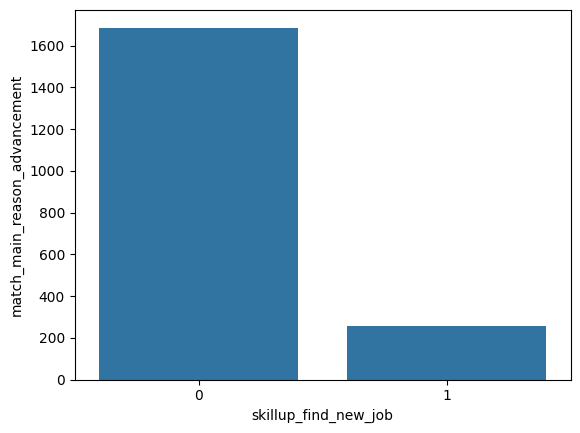

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=pivot_table_matching_breakout.reset_index(), x='skillup_find_new_job', y='match_main_reason_advancement')
plt.show()

In [ ]:
dataset_id = "wpac_data"

client = bigquery.Client(project=project_id)
datasets = [dataset.dataset_id for dataset in client.list_datasets()]
print("Available Datasets:", datasets)

if dataset_id not in datasets:
    print(f"Dataset {dataset_id} does not exist. Creating it now...")
    dataset_ref = client.dataset(dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = "US"  # Change if necessary
    client.create_dataset(dataset, exists_ok=True)
    print(f"Dataset {dataset_id} created.")


Available Datasets: ['wpac_data']


In [ ]:
import pandas_gbq

dataset_table = "wpac_data.merged_wpac"  # Replace with dataset.table name

# Load your CSV into a DataFrame
csv_file_path = "merged_wpac.csv"  # Replace with your actual file path
# df = pd.read_csv(csv_file_path)

# Use `pandas_gbq.to_gbq` to upload DataFrame
pandas_gbq.to_gbq(
    df,
    destination_table=dataset_table,
    project_id=project_id,
    if_exists="replace"  # "fail", "replace", "append"
)


100%|██████████| 1/1 [00:00<00:00, 7073.03it/s]
